In [34]:
from math import *
import numpy as np
def five_p_to_six_t(points): #takes in a list of 5 elements of length  3 (points) and returns a list of 6 elements of length 3 of length 3 (triangles)
    A = points[0]
    B = points[1]
    C = points[2]
    D = points[3]
    E = points[4]
    triangles = [[A,B,D], [B,C,D], [C,A,D], [B, A, E], [A, C, E], [C, B, E]]
    return triangles
def five_p_to_fifteen_p(points): #takes in -//the same as above//- (2 stacked pyramids) and returns a list of 3 lists of 5 vertices (each list 
    #being its own stacked pyramids)
    A = points[0]
    B = points[1]
    C = points[2]
    D = points[3]
    E = points[4]
    AB=(5*A+4*B)/9
    BA=(5*B+4*A)/9
    BC=(5*B+4*C)/9
    CB=(5*C+4*B)/9
    CA=(5*C+4*A)/9
    AC=(5*A+4*C)/9
    p=[E,D,A,AB,AC]
    d=[E,D,B,BC,BA]
    t=[E,D,C,CA,CB]
    return [p,d,t]
    
def generate_fractal(stacked_pyramid, iterations): #takes in a list of 5 vertices (a stacked pyramid) and returns a list of 3^iterations of stacked pyramids
    fractal = [stacked_pyramid]
    for i in range(iterations):
        real_index = 0
        for j in range(len(fractal)):
            pyramids = five_p_to_fifteen_p(fractal[real_index])
            del fractal[real_index]
            fractal.insert(real_index, pyramids[0])
            fractal.insert(real_index, pyramids[1])
            fractal.insert(real_index, pyramids[2])
            real_index = real_index + 3
    return fractal
def generate_triangles(fractal): #takes in a list of n stacked pyramids and returns a list of 6n triangles
    triangles = []
    for stacked_pyramid in fractal:
        drejkanty = five_p_to_six_t(stacked_pyramid)
        for triangle in drejkanty:
            triangles.append(triangle)
    return triangles
        
    
    
    
    


In [17]:
A=np.array([-3/2, -sqrt(3)/2, 0])
B=np.array([3/2, -sqrt(3)/2, 0])
C=np.array([0, sqrt(3), 0])
D=np.array([0,0,1])
E=np.array([0,0,-1])
points=[A,B,C,D,E]


In [18]:
five_p_to_fifteen_p(points)

[[array([ 0,  0, -1]),
  array([0, 0, 1]),
  array([-1.5      , -0.8660254,  0.       ]),
  array([-0.16666667, -0.8660254 ,  0.        ]),
  array([-0.83333333,  0.28867513,  0.        ])],
 [array([ 0,  0, -1]),
  array([0, 0, 1]),
  array([ 1.5      , -0.8660254,  0.       ]),
  array([0.83333333, 0.28867513, 0.        ]),
  array([ 0.16666667, -0.8660254 ,  0.        ])],
 [array([ 0,  0, -1]),
  array([0, 0, 1]),
  array([0.        , 1.73205081, 0.        ]),
  array([-0.66666667,  0.57735027,  0.        ]),
  array([0.66666667, 0.57735027, 0.        ])]]

In [26]:
import plotly.graph_objects as go

def plotTriangle(triangles):
    fig = go.Figure()
    for triangle in triangles:
        
        x = [vertex[0] for vertex in triangle]
        y = [vertex[1] for vertex in triangle]
        z = [vertex[2] for vertex in triangle]
        
        fig.add_trace(go.Mesh3d(
            x=x,  
            y=y,  
            z=z,  
            color='cyan', 
            opacity=1,  
            i=[0],  
            j=[1],  
            k=[2],  
        ))
    fig.update_layout(
    scene=dict(
            xaxis=dict(title='X', range=[-3, 3]),  # Custom X-axis limits
            yaxis=dict(title='Y', range=[-3, 3]),  # Custom Y-axis limits
            zaxis=dict(title='Z', range=[-3, 3]),  # Custom Z-axis limits
            aspectmode='cube'  # Equal scale for all axes
        ),
    title="Koch's surface"
    )
    fig.show()

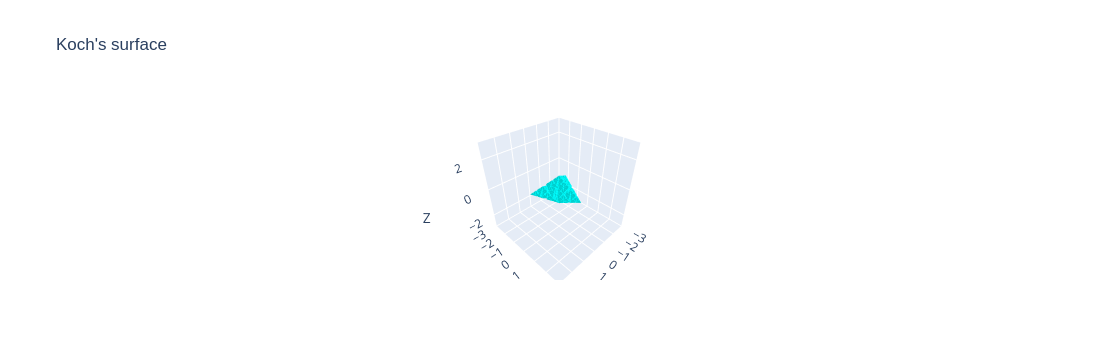

In [39]:

plotTriangle(generate_triangles(generate_fractal(points,6)))

In [32]:
points

[array([-1.5      , -0.8660254,  0.       ]),
 array([ 1.5      , -0.8660254,  0.       ]),
 array([0.        , 1.73205081, 0.        ]),
 array([0, 0, 1]),
 array([ 0,  0, -1])]

np.float64(-0.8660254037844386)

np.float64(0.0)